In [34]:
import ujson as json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with open("asr_ranks.json", "r") as f:
    ranks_asr = json.load(f)

with open("caption_ranks.json", "r") as f:
    ranks_caption = json.load(f)

with open("image_ranks.json", "r") as f:
    ranks_image = json.load(f)

with open("cosmir_ranks.json", "r") as f:
    ranks_cosmir = json.load(f)

In [ ]:
from data import queries

In [ ]:
mrr = []
for i in range(len(queries)):
    rank = min([ranks_asr[i].index(q) for q in queries[i].correct_segments])+1
    mrr.append({
        "rank": rank,
        "mrr": 1.0/rank,
        "method": "ASR transcript",
        "query": i
    })
    rank = min([ranks_caption[i].index(q) for q in queries[i].correct_segments])+1
    mrr.append({
        "rank": rank,
        "mrr": 1.0/rank,
        "method": "Caption Embedding",
        "query": i
    })
    rank = min([ranks_image[i].index(q) for q in queries[i].correct_segments])+1
    mrr.append({
        "rank": rank,
        "mrr": 1.0/rank,
        "method": "Image Embedding",
        "query": i
    })
    rank = min([ranks_cosmir[i].index(q) for q in queries[i].correct_segments])+1
    mrr.append({
        "rank": rank,
        "mrr": 1.0/rank,
        "method": "Cosmir",
        "query": i
    })

mrr_df = pd.DataFrame(mrr)

In [ ]:
cat = sns.catplot(data=mrr_df, x="method", y="mrr", aspect=11/8)

In [46]:
cutoffs = [1,2,5,10,25,50,100,130]

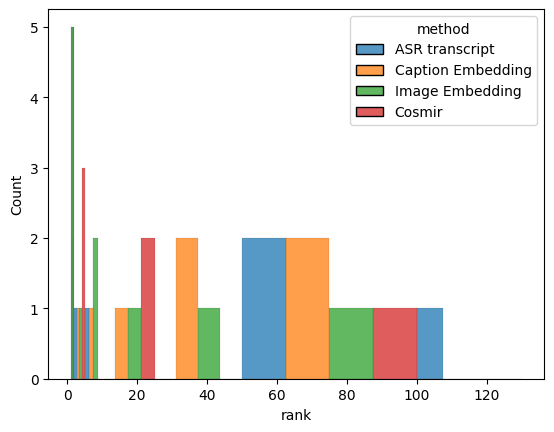

In [32]:
hist = sns.histplot(data=mrr_df, x="rank", hue="method", multiple="dodge", bins=cutoffs)

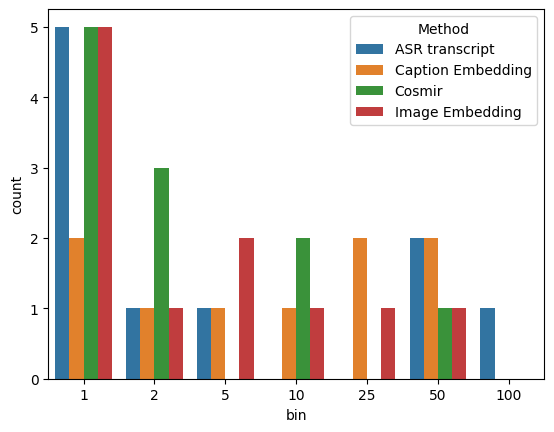

In [47]:
# Create a DataFrame with bins and counts for each method
hist_data = []
for method_group in mrr_df.groupby("method"):
    method_name, method_group = method_group
    counts, _ = np.histogram(method_group["rank"], bins=cutoffs)
    hist_data.extend({"method": method_name, "bin": bin, "count": count} for bin, count in zip(cutoffs, counts))

hist_df = pd.DataFrame(hist_data)

# Plotting side-by-side bars with the same width
sns.barplot(data=hist_df, x="bin", y="count", hue="method", dodge=True)

# Add legend
plt.legend(title="Method")

# Show the plot
plt.show()